# Fligh Price Prediction Model

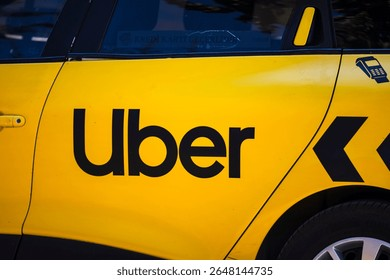

In [94]:
import IPython
image_url = 'https://www.shutterstock.com/image-photo/antalya-turkey-20250619-closeup-view-260nw-2648144735.jpg'

IPython.display.Image(image_url)

### Model Descirption:-
# Uber Taxi data used to predict the future prices 

### Step1: Downloading dataset and saving into server system

In [2]:
#Downloading data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\yashdevladdha\uber-ride-analytics-dashboard\versions\2


### Step 2.1 : Extracting the data and converting it into dataframe

In [3]:
#checking availables data files in system (csv or excel)
import os
available_files_list= os.listdir(path)
print(f"There are {len(available_files_list)} File available")
for i,value in enumerate(available_files_list):
    print(f"File {i+1} :  {value}")

There are 3 File available
File 1 :  Dasboard.gif
File 2 :  ncr_ride_bookings.csv
File 3 :  Uber.pbix


### Step 2.2: Converting into dataframe

In [4]:
import pandas as pd
file_path = path + '\\' + available_files_list[1] 
df = pd.read_csv(file_path)

### Step 3.1: Exploring data using EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [7]:
#Now looking for the data essentials:-
dfShape = df.shape
number_of_rows = dfShape[0]
number_of_columns = dfShape[1]
print(f'''
Data Shape : {dfShape}
Number of rows : {number_of_rows}
Number of columns : {number_of_columns}
''')


Data Shape : (150000, 21)
Number of rows : 150000
Number of columns : 21



In [8]:
#Column data:-
df_column = df.columns
print(f"Column Data : {df_column}")

Column Data : Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')


In [9]:
#Sample data
df.sample()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
70826,2024-06-28,16:15:38,"""CNR3771763""",Completed,"""CID3549218""",Premier Sedan,INA Market,Barakhamba Road,5.0,28.6,...,NaN,NaN,NaN,NaN,NaN,738.0,18.49,4.2,3.1,Uber Wallet


In [11]:
# Exploring the head and tail sections

In [12]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [13]:
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [14]:
maximumPrice = max(df['Booking Value'])
minimumPrice = min(df['Booking Value'])
print(f'''
Maximum Ticket price : {maximumPrice}
Lowest Ticket price: {minimumPrice}
''')



Maximum Ticket price : nan
Lowest Ticket price: nan



In [15]:
#Checking for null values
df.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [16]:
#No null Values found

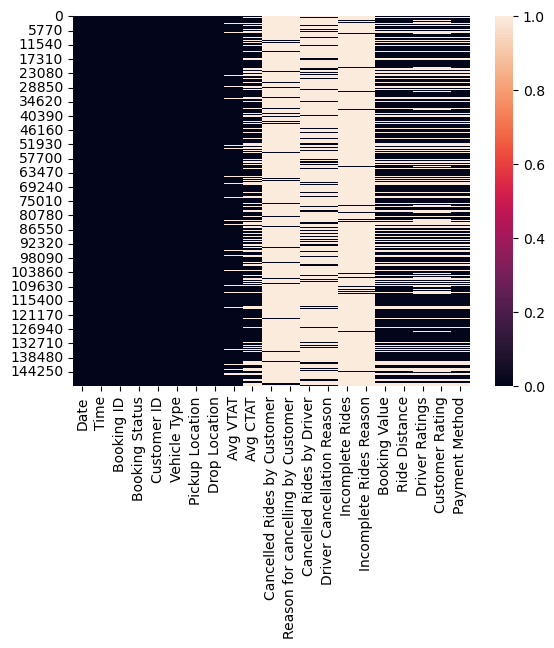

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isna())
plt.show()

In [18]:
#No null valus are found!

In [19]:
df.sample()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
53359,2024-04-19,14:09:41,"""CNR4812479""",Cancelled by Driver,"""CID7875567""",eBike,DLF City Court,Basai Dhankot,11.2,NaN,...,NaN,1.0,More than permitted people in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.fillna(0)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,0.0,0.0,...,0,0.0,0,0.0,0,0.0,0.00,0.0,0.0,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,0,0.0,0,1.0,Vehicle Breakdown,237.0,5.73,0.0,0.0,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,0,0.0,0,0.0,0,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,0,0.0,0,0.0,0,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,0,0.0,0,0.0,0,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,0,0.0,0,0.0,0,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,0,0.0,0,0.0,0,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,0,0.0,0,0.0,0,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,0,0.0,0,0.0,0,333.0,45.54,4.1,3.7,UPI


In [21]:
'''
Cleaning data as we need numerical vales but in columns, 
departure_time, stops, arrival_time, class: textual data is available
'''


'\nCleaning data as we need numerical vales but in columns, \ndeparture_time, stops, arrival_time, class: textual data is available\n'

In [22]:
column_to_Check = ['Avg VTAT','Avg CTAT', 'Cancelled Rides by Driver','Driver Cancellation Reason','Incomplete Rides','Incomplete Rides Reason','Booking Value','Ride Distance','Driver Ratings','Customer Rating']
for i in column_to_Check:
    print(f"{i}: {df[i].unique()}")

Avg VTAT: [ nan  4.9 13.4 13.1  5.3  5.1  7.1 12.1  6.1  7.7  4.6 12.2 14.   8.5
  5.6  6.  12.4 10.3  7.  10.4  7.9 13.6 11.5  3.1  8.9  9.2  2.   5.4
 14.6  6.7  6.6 10.  11.   8.  12.8  6.4 11.3  2.3  7.8  8.8  9.9  4.1
 11.2  3.   9.1  4.3 11.4  6.3 11.7 16.6  5.8  4.   3.4 11.1  5.9  8.1
  5.  12.   3.2  9.6  3.9  8.4 10.9  5.7  8.6  9.5  2.6  2.1 14.4  7.5
 10.8 14.7  3.5  8.3 11.9 12.5 13.3  9.7  3.6  9.4  9.   2.4 19.1  2.9
 18.5 16.1 13.7  4.5  6.9  6.2  7.2  3.7 11.6  3.3  4.7  7.4  9.3  8.2
 13.5  4.4  2.7  7.3 10.5  6.8 10.7 12.3  3.8 10.2  9.8  8.7 14.2  6.5
 12.9  4.2  5.2 16.9  7.6 14.9 11.8 14.3 10.1 12.6 14.8 13.2 14.5  4.8
 14.1  2.5 15.  16.2 12.7  5.5  2.8 19.2 18.  13.9 13.  10.6 20.  17.6
 15.7  2.2 16.5 15.9 19.6 19.9 19.8 16.  16.4 13.8 18.7 17.  15.5 16.8
 16.7 15.4 18.8 17.8 19.3 17.2 15.2 19.7 17.5 17.1 16.3 15.1 18.3 17.3
 19.4 19.5 17.4 19.  18.6 15.6 18.2 18.4 18.1 15.3 17.9 17.7 18.9 15.8]
Avg CTAT: [ nan 14.  25.8 28.5 19.6 18.1 20.4 16.5 26.  18.9 28.2 

In [23]:
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


In [24]:
df.sample()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
24332,2024-09-04,15:10:02,"""CNR5121318""",Cancelled by Customer,"""CID3364829""",Go Mini,Tis Hazari,Model Town,10.2,NaN,...,AC is not working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Now creating a list that contains necessary columns for ML training
final_column = ['Ride Distance',	'Driver Ratings',	'Customer Rating','Avg VTAT',	'Avg CTAT','Booking Value']
final_df = df[final_column]
final_df.sample()

,Ride Distance,Driver Ratings,Customer Rating,Avg VTAT,Avg CTAT,Booking Value
52036,44.76,4.6,4.3,12.1,38.5,305.0


In [37]:
final_df.fillna(0)

,Ride Distance,Driver Ratings,Customer Rating,Avg VTAT,Avg CTAT,Booking Value
0,0.00,0.0,0.0,0.0,0.0,0.0
1,5.73,0.0,0.0,4.9,14.0,237.0
2,13.58,4.9,4.9,13.4,25.8,627.0
3,34.02,4.6,5.0,13.1,28.5,416.0
4,48.21,4.1,4.3,5.3,19.6,737.0
...,...,...,...,...,...,...
149995,40.08,3.7,4.1,10.2,44.4,475.0
149996,21.31,4.8,5.0,5.1,30.8,1093.0
149997,15.93,3.9,4.4,2.7,23.4,852.0
149998,45.54,4.1,3.7,6.9,39.6,333.0


In [38]:
final_df.sample()

,Ride Distance,Driver Ratings,Customer Rating,Avg VTAT,Avg CTAT,Booking Value
84902,10.29,4.7,4.2,13.8,37.6,527.0


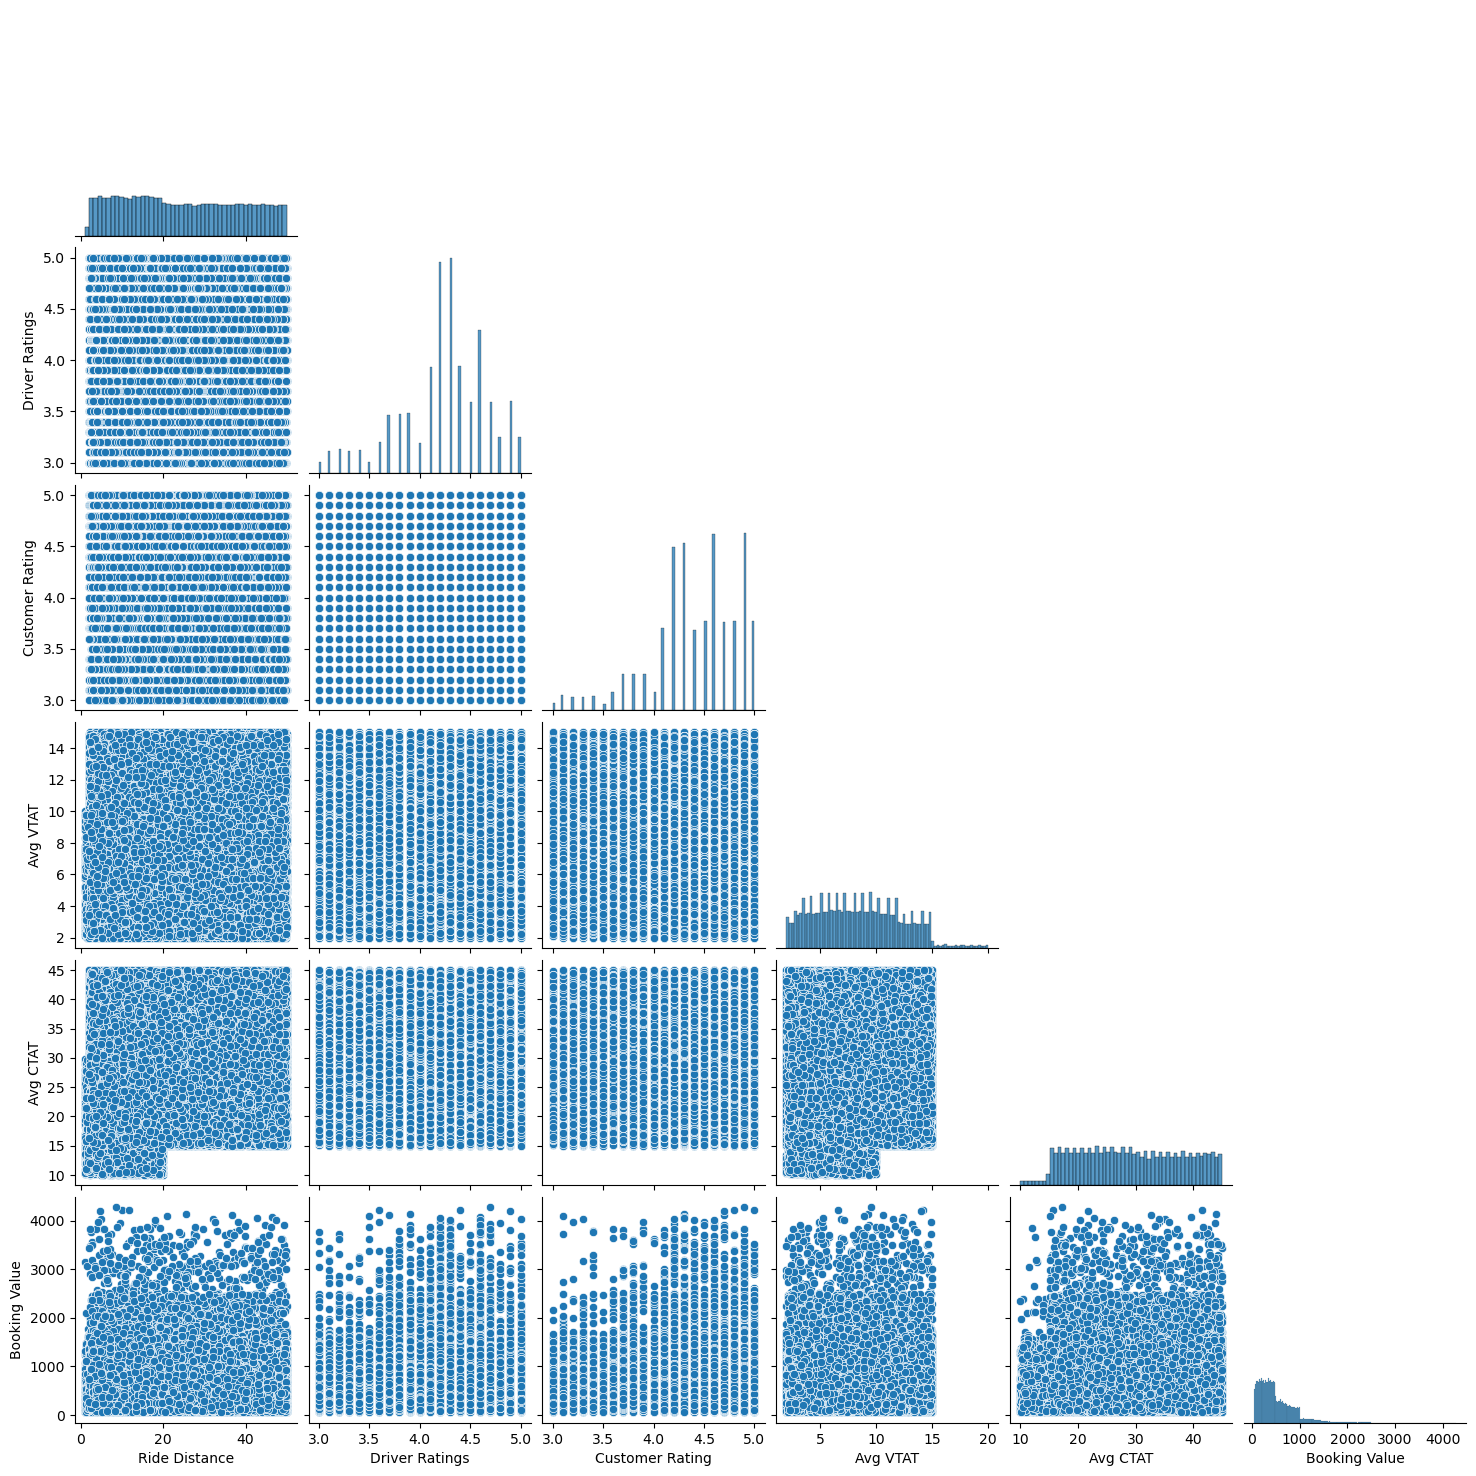

In [26]:
sns.pairplot(final_df,corner=True)
plt.show()

In [27]:
final_df.describe()

,Ride Distance,Driver Ratings,Customer Rating,Avg VTAT,Avg CTAT,Booking Value
count,102000.000000,93000.000000,93000.000000,139500.000000,102000.000000,102000.000000
mean,24.637012,4.230992,4.404584,8.456352,29.149636,508.295912
std,14.002138,0.436871,0.437819,3.773564,8.902577,395.805774
min,1.000000,3.000000,3.000000,2.000000,10.000000,50.000000
25%,12.460000,4.100000,4.200000,5.300000,21.600000,234.000000
50%,23.720000,4.300000,4.500000,8.300000,28.800000,414.000000
75%,36.820000,4.600000,4.800000,11.300000,36.800000,689.000000
max,50.000000,5.000000,5.000000,20.000000,45.000000,4277.000000


In [28]:
final_df.sample()

,Ride Distance,Driver Ratings,Customer Rating,Avg VTAT,Avg CTAT,Booking Value
38847,13.22,NaN,NaN,7.7,11.9,205.0


In [44]:
#dataX be the features influencing the Price
dataX= final_df[['Ride Distance',	'Driver Ratings',	'Customer Rating','Avg VTAT',	'Avg CTAT']]
#dataY be the price 
dataY= final_df['Booking Value']
print('data Split successfully!')

data Split successfully!


In [45]:
dataX.sample()

,Ride Distance,Driver Ratings,Customer Rating,Avg VTAT,Avg CTAT
21110,18.9,NaN,NaN,4.5,26.0


In [75]:
dataX=dataX.fillna(0)
dataY=dataY.fillna(0)
print('done')

done


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataX,dataY,test_size=0.17, random_state= 150 )
print('Done')


Done


In [77]:
#Overviewing the shapes
print(f'''
Training Data:- 
Shape of X_train : {X_train.shape}
shape of y_train : {y_train.shape}
 {'_'*40}
shape of X_test : {X_test.shape}
shape of Y_test : {y_test.shape}

''')


Training Data:- 
Shape of X_train : (124499, 5)
shape of y_train : (124499,)
 ________________________________________
shape of X_test : (25501, 5)
shape of Y_test : (25501,)




In [78]:
X_train.fillna(0)

,Ride Distance,Driver Ratings,Customer Rating,Avg VTAT,Avg CTAT
9451,3.93,0.0,0.0,4.6,20.2
129530,25.16,4.6,4.6,5.6,38.5
124522,4.49,4.2,4.9,10.1,25.2
103280,7.37,0.0,0.0,9.6,19.0
241,13.10,3.6,4.6,10.0,40.6
...,...,...,...,...,...
55140,16.83,0.0,0.0,4.0,29.0
2354,13.57,5.0,4.9,8.3,25.5
131568,11.68,3.6,4.7,4.6,38.1
49177,5.97,0.0,0.0,4.3,24.6


In [79]:
X_train

,Ride Distance,Driver Ratings,Customer Rating,Avg VTAT,Avg CTAT
9451,3.93,0.0,0.0,4.6,20.2
129530,25.16,4.6,4.6,5.6,38.5
124522,4.49,4.2,4.9,10.1,25.2
103280,7.37,0.0,0.0,9.6,19.0
241,13.10,3.6,4.6,10.0,40.6
...,...,...,...,...,...
55140,16.83,0.0,0.0,4.0,29.0
2354,13.57,5.0,4.9,8.3,25.5
131568,11.68,3.6,4.7,4.6,38.1
49177,5.97,0.0,0.0,4.3,24.6


In [80]:
X_train.isna().sum()

Ride Distance      0
Driver Ratings     0
Customer Rating    0
Avg VTAT           0
Avg CTAT           0
dtype: int64

In [81]:
X_train=X_train.fillna(0)
X_train.isna().sum()

Ride Distance      0
Driver Ratings     0
Customer Rating    0
Avg VTAT           0
Avg CTAT           0
dtype: int64

In [91]:
X_train.columns

Index(['Ride Distance', 'Driver Ratings', 'Customer Rating', 'Avg VTAT',
       'Avg CTAT'],
      dtype='object')

In [93]:
X_train.sample()

,Ride Distance,Driver Ratings,Customer Rating,Avg VTAT,Avg CTAT
5307,34.76,4.9,4.3,14.9,27.8


In [82]:
y_train=y_train.fillna(0)

# MODEL CREATION

In [83]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [84]:
#Making prediction
y_predicted = model.predict(X_test)
print("Prediction successfully!")

Prediction successfully!


In [85]:
#Creating a temporary dataframe called comparing_df to explore the results
comparing_data_dict = {
"Actual Price":y_test,
"Predicted Price":y_predicted,
"Margin of Error":abs(y_test-y_predicted)
}
comparison_df = pd.DataFrame(comparing_data_dict)
comparison_df["Actual Price"]=round(comparison_df["Actual Price"])
comparison_df["Predicted Price"]=round(comparison_df["Predicted Price"])
comparison_df["Margin of Error"]=round(comparison_df["Margin of Error"])
comparison_df["Error Percentage"]=round(comparison_df["Margin of Error"] / comparison_df["Actual Price"] *100 ,1)

In [86]:
comparison_df

,Actual Price,Predicted Price,Margin of Error,Error Percentage
7288,1529.0,513.0,1016.0,66.4
57211,460.0,390.0,70.0,15.2
143972,148.0,454.0,306.0,206.8
46712,364.0,512.0,148.0,40.7
26893,819.0,464.0,355.0,43.3
...,...,...,...,...
107718,237.0,272.0,35.0,14.8
70864,1351.0,476.0,875.0,64.8
25451,0.0,54.0,54.0,inf
132183,128.0,503.0,375.0,293.0


In [87]:
def Errors(model,xTrain,yTrain):
    from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error
    mae=mean_absolute_error(xTrain,yTrain) 
    mse =mean_squared_error(xTrain,yTrain) 
    rmse =root_mean_squared_error(xTrain,yTrain) 

    print(f'''
Errors:-
1. Mean Absolute Error = {mae}
2. Mean Squared Error = {mse}
3. Root Mean Square Error ={rmse}  
    ''')

        

In [88]:
Errors(model,y_test,y_predicted)


Errors:-
1. Mean Absolute Error = 217.63951154226365
2. Mean Squared Error = 115359.89249004913
3. Root Mean Square Error =339.646717178378  
    


In [89]:
print(f'''
Training Score: {model.score(X_train,y_train)}
Testing Score: {model.score(X_test,y_test)}
''')


Training Score: 0.2905821976551638
Testing Score: 0.2887149867877503



In [ ]:
dataX.sample()

In [ ]:
dataX.sample()

In [90]:
import pickle

with open('cab_model.pkl','wb') as f:
    pickle.dump(model,f)
    #pickle.dump(final_y,f)

print('done')

done
